In [69]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import datetime, itertools
import community

In [2]:
co_offending_table = pd.read_csv('./Cooffending.csv')

# Remove duplicate rows
co_offending_table.drop_duplicates(inplace=True)

# Format the date column as a python datetime object
co_offending_table['Date'] = co_offending_table.Date.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

In [76]:
len(np.unique(co_offending_table.NCD1))

295

In [60]:
# dual network: simple, unweighted
dual_network_representation_simple = nx.Graph()

def add_edges_dual_simple(network_representation, crime_event_df):
    #print(crime_event_df.index)
    for (index_1, index_2) in itertools.combinations(crime_event_df.index, 2):
        seq1 = crime_event_df.get_value(index=index_1, col='SeqE')
        seq2 = crime_event_df.get_value(index=index_2, col='SeqE')
        # only will add nodes once 
        #network_representation.add_node(seq1, 
        #                                ncd1=crime_event_df.get_value(index=index_1, col='NCD1'),
        #                                mun=crime_event_df.get_value(index_1, col='MUN'),
        #                                ed1 = crime_event_df.get_value(index_1, col='ED1'))
        #network_representation.add_node(seq2, 
        #                               ncd1=crime_event_df.get_value(index=index_2, col='NCD1'),
        #                                mun=crime_event_df.get_value(index_2, col='MUN'),
        #                                ed1 = crime_event_df.get_value(index_2, col='ED1'))
        # add the edge. Note that this will only ever add one undirected edge
        network_representation.add_edge(seq1, seq2)
    return None

co_offending_table.groupby('NoUnique').apply(lambda x: add_edges_dual_simple(dual_network_representation_simple, x))

""


In [62]:
nx.dual_network_representation_simple

SyntaxError: invalid syntax (<ipython-input-62-33e76175f02d>, line 1)

In [53]:
nx.attribute_assortativity_coefficient(dual_network_representation_simple, attribute='mun')

0.5750552578390602

In [57]:
nx.degree_assortativity_coefficient(dual_network_representation_simple)

0.99999473940842454

In [ ]:
# dual network: mutligraph, unweighted
dual_network_representation_multigraph = nx.MultiGraph()

def add_edges_dual_multi(network_representation, crime_events):
    for (crime_event1, crime_event2) in itertools.combinations(crime_events, 2):
            # in a simple, undirected graph, only one edge can be added 
            network_representation.add_edge(crime_event1, crime_event2)
    return None

co_offending_table.groupby('NoUnique').apply(lambda x: add_edges_dual_multi(dual_network_representation_simple, list(x.SeqE)))

In [45]:
connected_component_sizes = list(map(lambda subgraph: len(subgraph.nodes()), 
                                    nx.connected_component_subgraphs(dual_network_representation_simple)))

In [46]:
connected_component_sizes.sort()

In [48]:
connected_component_sizes = connected_component_sizes[::-1]

In [53]:
connected_component_sizes

[120603,
 543,
 456,
 403,
 359,
 352,
 351,
 336,
 332,
 315,
 292,
 291,
 284,
 279,
 271,
 267,
 258,
 242,
 242,
 238,
 237,
 235,
 231,
 230,
 228,
 221,
 221,
 220,
 218,
 216,
 211,
 209,
 206,
 205,
 203,
 201,
 199,
 198,
 198,
 197,
 197,
 196,
 193,
 192,
 192,
 192,
 191,
 189,
 188,
 188,
 186,
 185,
 181,
 177,
 175,
 174,
 173,
 173,
 173,
 173,
 172,
 172,
 169,
 168,
 168,
 168,
 167,
 167,
 166,
 164,
 164,
 162,
 160,
 156,
 155,
 155,
 155,
 155,
 154,
 151,
 150,
 150,
 150,
 150,
 150,
 148,
 146,
 146,
 145,
 145,
 145,
 144,
 144,
 143,
 143,
 140,
 139,
 137,
 137,
 137,
 137,
 137,
 136,
 136,
 136,
 136,
 135,
 135,
 134,
 134,
 134,
 134,
 133,
 132,
 132,
 130,
 129,
 129,
 129,
 129,
 129,
 127,
 127,
 127,
 126,
 126,
 125,
 125,
 125,
 125,
 124,
 124,
 124,
 123,
 123,
 122,
 122,
 122,
 121,
 121,
 121,
 121,
 119,
 119,
 118,
 118,
 118,
 117,
 116,
 116,
 116,
 115,
 115,
 115,
 114,
 114,
 114,
 113,
 112,
 112,
 112,
 111,
 111,
 111,
 111,
 111,
 

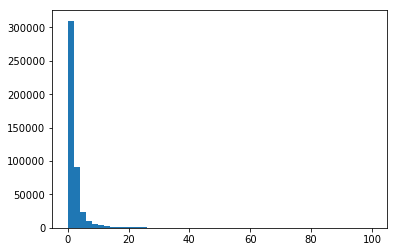

In [81]:
plt.hist(connected_component_sizes, range=(0, 100), bins=50)
plt.show()

In [64]:
largest_component = max(nx.connected_component_subgraphs(dual_network_representation_simple), key=len)

In [74]:
len(largest_component.nodes())

120603

In [73]:
community.best_partition(largest_component)

AttributeError: module 'community' has no attribute 'best_partition'